Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5277 - accuracy: 0.8155 - val_loss: 0.4290 - val_accuracy: 0.8439
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3983 - accuracy: 0.8552 - val_loss: 0.3997 - val_accuracy: 0.8579
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3641 - accuracy: 0.8675 - val_loss: 0.3686 - val_accuracy: 0.8701
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3458 - accuracy: 0.8721 - val_loss: 0.3633 - val_accuracy: 0.8665
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3266 - accuracy: 0.8788 - val_loss: 0.3465 - val_accuracy: 0.8749
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3148 - accuracy: 0.8830 - val_loss: 0.3431 - val_accuracy: 0.8765
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3060 - accuracy: 0.8863 - val_loss: 0.3625 - val_accuracy:

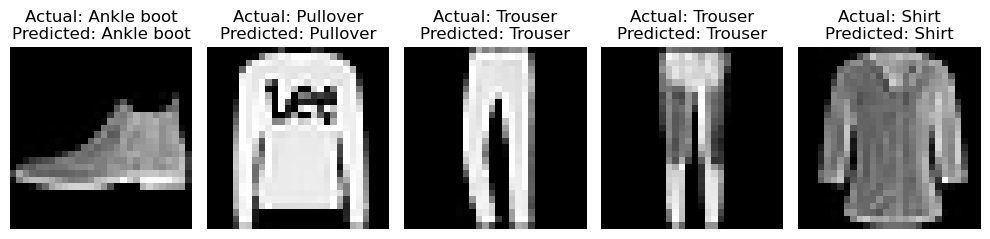

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Load the MNIST Fashion dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to range between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Build the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy*100)

# Generate predictions
predictions = model.predict(x_test)

# Map class indices to class labels
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot example dress images with actual and predicted labels
num_examples = 5
plt.figure(figsize=(10, 4))
for i in range(num_examples):
    plt.subplot(1, num_examples, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')
    plt.title(f"Actual: {class_labels[y_test[i]]}\nPredicted: {class_labels[predictions[i].argmax()]}")
plt.tight_layout()
plt.show()